<a href="https://colab.research.google.com/github/prachi1101/TASK-1-/blob/main/task3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import zipfile
import io
import pandas as pd
import requests

# Download and read the ZIP file
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank-additional.zip"
r = requests.get(url)

# Extract the CSV file from the ZIP
with zipfile.ZipFile(io.BytesIO(r.content)) as z:
    with z.open('bank-additional/bank-additional-full.csv') as f:
        df = pd.read_csv(f, sep=';')

# Now df is ready to use
print("Dataset shape:", df.shape)
print(df.head())


Dataset shape: (41188, 21)
   age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.

Dataset shape: (41188, 21)

First 5 rows:
   age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.

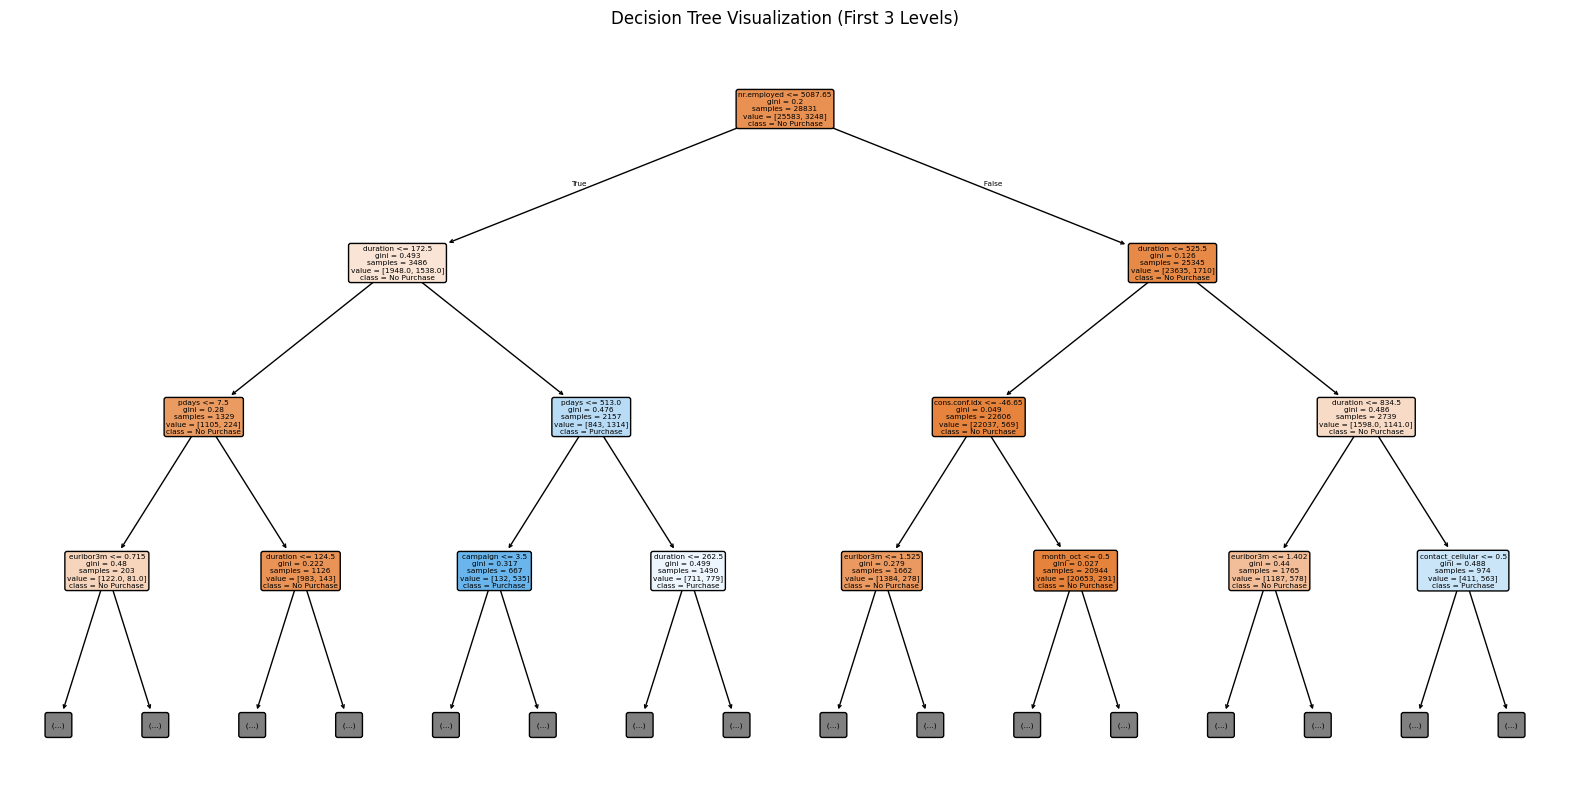

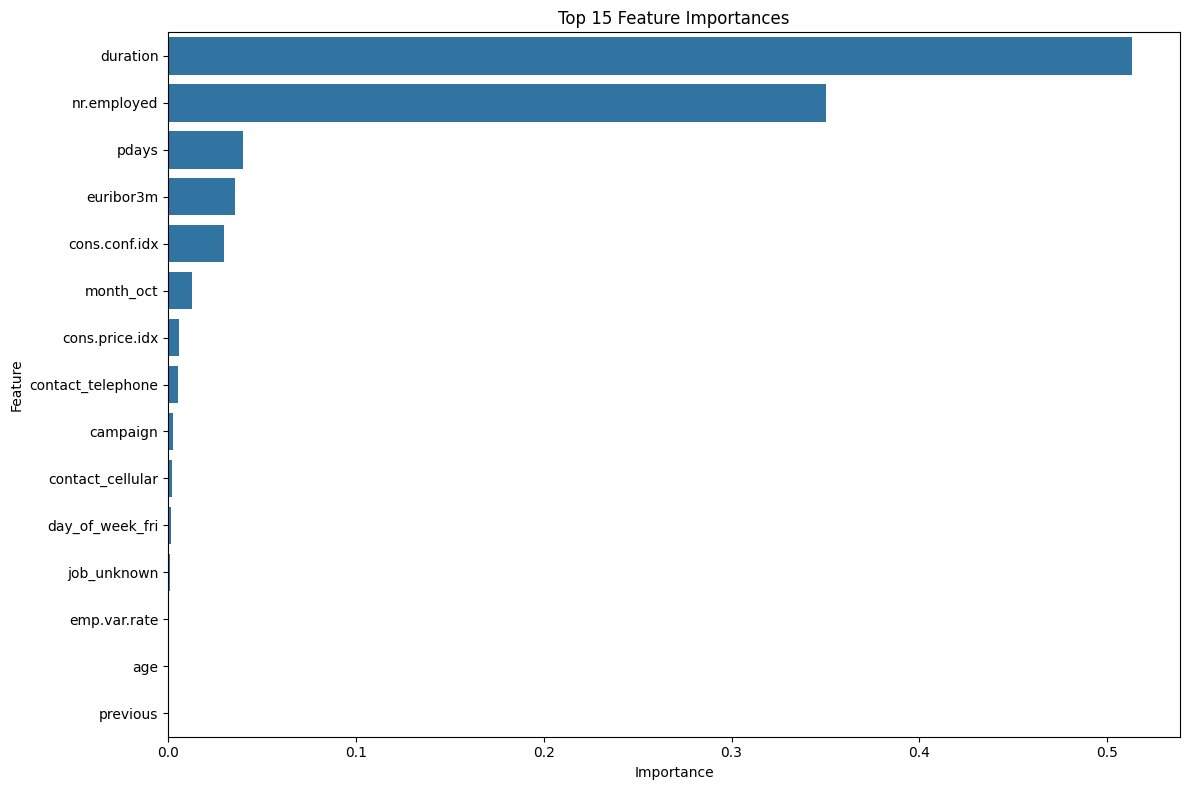


=== Class Distribution ===
Original distribution:
y
0    0.887346
1    0.112654
Name: proportion, dtype: float64

Training set distribution:
y
0    0.887343
1    0.112657
Name: proportion, dtype: float64

Test set distribution:
y
0    0.887351
1    0.112649
Name: proportion, dtype: float64


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
import io
import requests

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# === Load dataset from ZIP ===
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank-additional.zip"
r = requests.get(url)

with zipfile.ZipFile(io.BytesIO(r.content)) as z:
    with z.open('bank-additional/bank-additional-full.csv') as f:
        df = pd.read_csv(f, sep=';')

print("Dataset shape:", df.shape)
print("\nFirst 5 rows:")
print(df.head())

# === Data Preprocessing ===
print("\n=== Data Preprocessing ===")

# Convert target variable to binary (0/1)
df['y'] = df['y'].map({'no': 0, 'yes': 1})

# Check for missing values
print("\nMissing values per column:")
print(df.isnull().sum())

# Drop NA if any (optional here)
df = df.dropna()

# Separate features and target
X = df.drop('y', axis=1)
y = df['y']

# Identify categorical and numerical columns
categorical_cols = [col for col in X.columns if X[col].dtype == 'object']
numerical_cols = [col for col in X.columns if X[col].dtype in ['int64', 'float64']]

print("\nCategorical columns:", categorical_cols)
print("Numerical columns:", numerical_cols)

# Preprocessing pipelines
numerical_transformer = SimpleImputer(strategy='median')

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# === Train-Test Split ===
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y)

# === Model Training ===
print("\n=== Model Training ===")
dt_classifier = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(max_depth=5, random_state=42))
])

dt_classifier.fit(X_train, y_train)

# === Model Evaluation ===
print("\n=== Model Evaluation ===")
y_pred = dt_classifier.predict(X_test)

print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# === Feature Importance ===
onehot_columns = list(dt_classifier.named_steps['preprocessor'].
                      named_transformers_['cat'].
                      named_steps['onehot'].
                      get_feature_names_out(categorical_cols))

all_features = numerical_cols + onehot_columns
importances = dt_classifier.named_steps['classifier'].feature_importances_

feature_importance = pd.DataFrame({'Feature': all_features, 'Importance': importances})
feature_importance = feature_importance.sort_values('Importance', ascending=False)

print("\nTop 10 Important Features:")
print(feature_importance.head(10))

# === Visualize the Decision Tree ===
plt.figure(figsize=(20, 10))
plot_tree(dt_classifier.named_steps['classifier'],
          feature_names=all_features,
          class_names=['No Purchase', 'Purchase'],
          filled=True, rounded=True,
          max_depth=3)
plt.title("Decision Tree Visualization (First 3 Levels)")
plt.show()

# === Plot Feature Importances ===
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance.head(15))
plt.title('Top 15 Feature Importances')
plt.tight_layout()
plt.show()

# === Class Distribution ===
print("\n=== Class Distribution ===")
print("Original distribution:")
print(y.value_counts(normalize=True))

print("\nTraining set distribution:")
print(y_train.value_counts(normalize=True))

print("\nTest set distribution:")
print(y_test.value_counts(normalize=True))
